In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [102]:
mpg=pd.read_csv('mpg.csv')

In [94]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [103]:
mpg.describe()
#notice horsepower and name columns are missing

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [104]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [85]:
#origin needs to be converted to dummy variable before adding to the model
mpg = pd.get_dummies(mpg, columns=['origin'])

In [86]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
name            398 non-null object
origin_1        398 non-null uint8
origin_2        398 non-null uint8
origin_3        398 non-null uint8
dtypes: float64(3), int64(3), object(2), uint8(3)
memory usage: 26.1+ KB


In [72]:
#remove missing horsepower value
mpg = mpg.replace('?', np.nan)
mpg=mpg.dropna()

In [73]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 11 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null object
weight          392 non-null int64
acceleration    392 non-null float64
model_year      392 non-null int64
name            392 non-null object
origin_1        392 non-null uint8
origin_2        392 non-null uint8
origin_3        392 non-null uint8
dtypes: float64(3), int64(3), object(2), uint8(3)
memory usage: 28.7+ KB


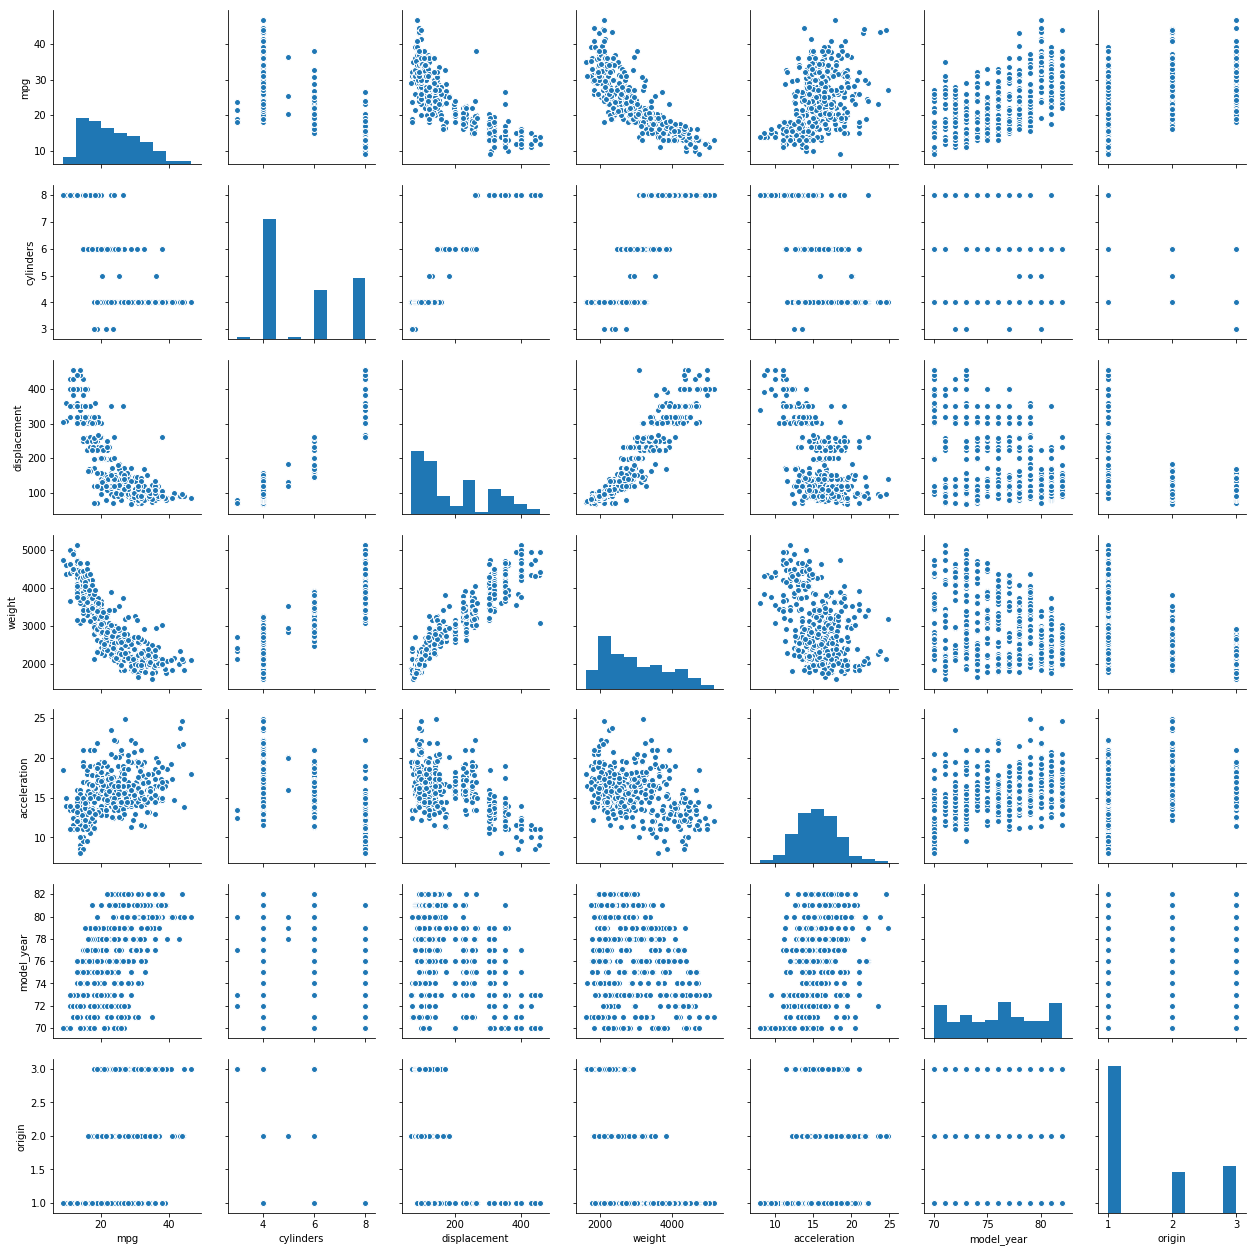

In [97]:
sns.pairplot(mpg)

In [74]:
#assign x, y; name can be dropped bc it is not meaningful 
X = mpg.drop(['mpg','name'], axis=1)
y = mpg[['mpg']]

In [75]:
from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

Training the model

In [76]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[-0.02738663  0.00516706  0.00587368 -0.00659039  0.16909928  0.65252531
  -1.53087699  0.05819482  1.47268217]]


Predict test data

In [78]:
predictions = lm.predict( X_test)

Text(0,0.5,'Predicted Y')

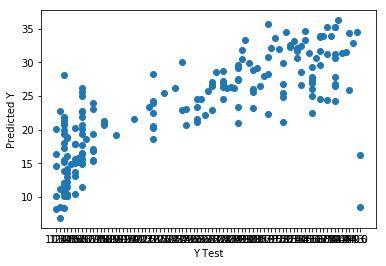

In [79]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [80]:
regression_model.score(X_test, y_test)

0.80588223767808043

Evaluating the model

In [98]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.63447460862
MSE: 12.5753927048
RMSE: 3.54618001584


Residual

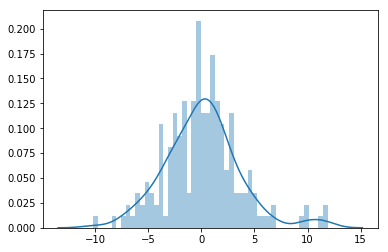

In [99]:
sns.distplot((y_test-predictions),bins=50);

Conclusion

In [105]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lm.coef_[0][idx]))

The coefficient for cylinders is -0.02738662723974545
The coefficient for displacement is 0.005167058754454094
The coefficient for horsepower is 0.0058736755053527875
The coefficient for weight is -0.006590387739368089
The coefficient for acceleration is 0.16909927605084096
The coefficient for model_year is 0.6525253091704475
The coefficient for origin_1 is -1.53087698606316
The coefficient for origin_2 is 0.058194817350262
The coefficient for origin_3 is 1.4726821687128993
